In [16]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List

#### 1) Partindo do código disponível no EAD (Arquivo: Codigo Python PCA), implemente o caso 3D.

In [21]:
def pontos_3d(P):
    np.random.seed(31)
    X = [2 * np.random.random_sample(P) - 1, 2 * np.random.random_sample(P) - 1, 2 * np.random.random_sample(P) - 1]
    X = np.array(X)
    Xp = []
    t1, t2, t3 = 0.9, 0.7, 1.2
    R1 = [[1, 0, 0], [0, np.cos(t1), -np.sin(t1)], [0, np.sin(t1), np.cos(t1)]]
    R2 = [[np.cos(t2), 0, np.sin(t2)], [0, 1, 0], [-np.sin(t2), 0, np.cos(t2)]]
    R3 = [[np.cos(t3), -np.sin(t3), 0], [np.sin(t3), np.cos(t3), 0], [0, 0, 1]]
    R = np.dot(np.dot(R1, R2), R3)   
    for i in range(P):
        if ((X[0][i]**2)/0.9712 + (X[1][i]**2)/0.534 + (X[2][i]**2)/0.734 - 1) < 0:
            U = np.dot(R, X[:,i])
            Xp.append(U)
    
    Xp = np.array(Xp)
    return Xp


In [22]:
# Essa função de centrar cada ponto P precisa ser modificada no s, que agora vai ser um vetor tridimensional
def center(X: np.ndarray) -> np.ndarray:
    P = len(X)
    # Agora s sempre vai ter a mesma dimensionalidade de xp
    s = X.shape[1]
    for i in range(P):
        s = s + X[i,:]
    X_mean = s / P
    X_centered = X - X_mean
    return X_centered


In [23]:
# Essa função PCA admite uma matriz X de qualquer tamanho, então a implementação dela não precisa ser modificada.
def PCA(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    P = len(X[0,:])
    Cov = 1/P * np.dot(X,X.T)
    D,V = np.linalg.eigh(Cov)
    return D,V

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


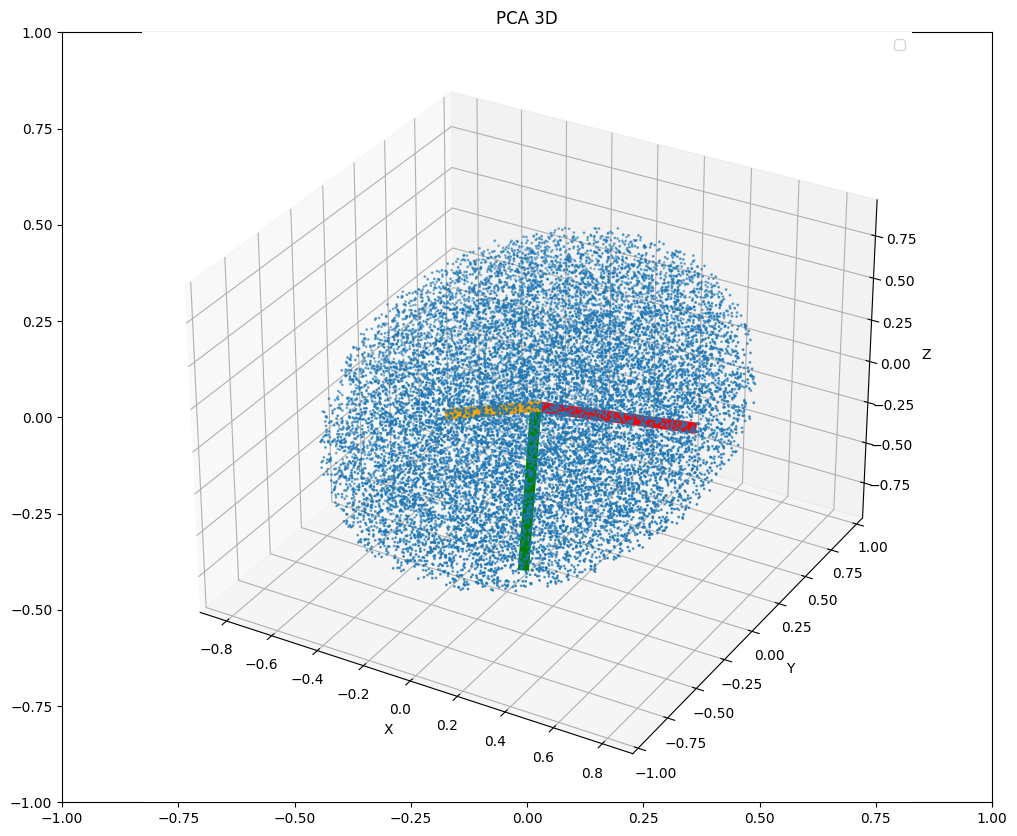

In [56]:
P = 50000
X = pontos_3d(P)
X = center(X)
[D,V] = PCA(X.T)

fig = plt.figure(figsize = (12, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)

ax = plt.axes(projection='3d')

# Reproduz os pontos de P
ax.scatter(X[:,0], X[:,1], X[:,2], zorder=2, s=1)

# Cores do gráfico
colors = ['red', 'green', 'orange']

for i in range(len(D)):
    x = [0, 2*np.sqrt(D[i])*V[i][0]]
    y = [0, 2*np.sqrt(D[i])*V[i][1]]
    z = [0, 2*np.sqrt(D[i])*V[i][2]]
    ax.plot(x, y, z, colors[i], zorder=1, linewidth=8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title('PCA 3D')

plt.show()